In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import analyze_cells_energy as ace
import re
import utils
import itertools
import seaborn as sns
import utils_PLS as upls

In [2]:
# load query file where we added volumes for each area
volumes = pd.read_csv("query_volumes_reordered.csv")
volumes = ace.clean_volumes_database(volumes)

In [3]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'BL_woF'
batch='BL_woF'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_BL_woF.npy', 
                                   allow_pickle=True).item()

In [4]:
dict_results_across_mice = upls.reformat_dict_acronym(dict_results=dict_results_across_mice, volumes=volumes)

# Format data for task PLS

In [5]:
upls.format_data_pls(dict_results=dict_results_across_mice, batch=batch, table='n_cells')
upls.format_data_pls(dict_results=dict_results_across_mice, batch=batch, table='energy')

In [6]:
data_ncells = pd.read_csv('./results_pls/'+batch+'_n_cells.csv')
data_energy = pd.read_csv('./results_pls/'+batch+'_energy.csv')

# Format data for hierarchy plotting

In [7]:
df_levels = upls.create_df_levels(volumes)

# Apply task PLS for all areas and energy

In [8]:
%%bash
python area_pls.py -i results_pls/BL_woF_n_cells.csv -o './results_pls/BL_woF'

2023-09-03 15:09:11 PC1QFRRQ __main__[153517] INFO reading data...
2023-09-03 15:09:11 PC1QFRRQ __main__[153517] INFO computing PLS...
2023-09-03 15:09:11 PC1QFRRQ __main__[153517] INFO PLS computed, now performing bootstrap...
2023-09-03 15:09:11 PC1QFRRQ __main__[153517] INFO saving output data...


In [9]:
# %%bash
# python area_pls.py -i results_pls/WILD_with_father_energy.csv -o './results_pls/WILD_with_father_energy'

# Plot results

In [10]:
contrasts = pd.read_csv('./results_pls/BL_woF_contrasts.csv')
saliences = pd.read_csv('./results_pls/BL_woF_saliences.csv')
contrasts = contrasts.rename(columns={"group_Control": "Control", "group_Fam": "Fam", "group_Unfam":"Unfam"})

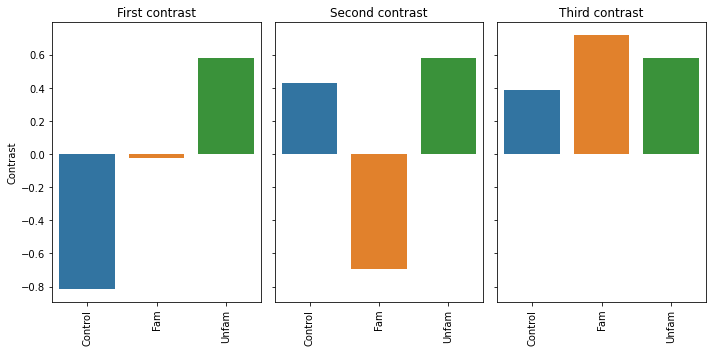

In [11]:
fig, axes = plt.subplots(1,3, sharey='row', figsize=(10,5))
upls.plot_contrasts(df_data=contrasts, index=0, ax=axes[0])
upls.plot_contrasts(df_data=contrasts, index=1, ax=axes[1])
upls.plot_contrasts(df_data=contrasts, index=2, ax=axes[2])
axes[0].set_ylabel('Contrast')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[0].tick_params(axis='x', labelrotation=90)
axes[1].tick_params(axis='x', labelrotation=90)
axes[2].tick_params(axis='x', labelrotation=90)
axes[0].set_title('First contrast')
axes[1].set_title('Second contrast')
axes[2].set_title('Third contrast')
for i in range(3):
    axes[i].set(xlabel=None)
plt.tight_layout()
plt.savefig('./results_pls/BL_woF_pls_contrasts_all_areas.png')
plt.savefig('./results_pls/BL_woF_pls_contrasts_all_areas.svg')

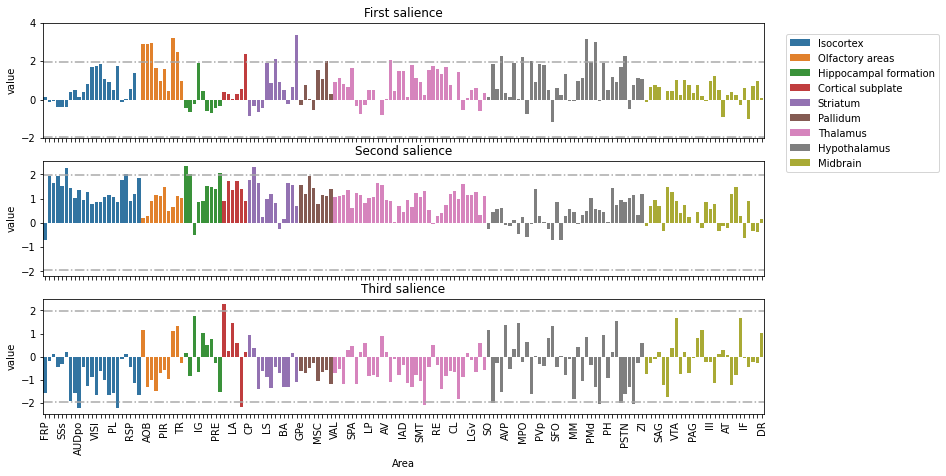

In [12]:
fig, axes = plt.subplots(3,1, sharex='row', figsize=(13,7))
plt.subplots_adjust(top=0.9, left=0.03, right=0.8)
upls.plot_saliences(df_data=saliences, index=0, ax=axes[0], df_levels=df_levels)
upls.plot_saliences(df_data=saliences, index=1, ax=axes[1], df_levels=df_levels)
upls.plot_saliences(df_data=saliences, index=2, ax=axes[2], df_levels=df_levels)
axes[0].tick_params(axis='x', labelrotation=90)
axes[1].tick_params(axis='x', labelrotation=90)
axes[2].tick_params(axis='x', labelrotation=90)
axes[0].set_xlabel('')
axes[0].set(xticklabels=[])
axes[0].set_ylim(-2,4)
axes[1].set_xlabel('')
axes[1].set(xticklabels=[])
axes[0].set_title('First salience')
axes[1].set_title('Second salience')
axes[2].set_title('Third salience')
axes[2].set_xlabel('Area')
axes[0].legend(loc='right', bbox_to_anchor=(1.25,0.3))
axes[1].get_legend().remove()
axes[2].get_legend().remove()
n = 4  # Keeps every 7th label
for i in range(3):
    axes[i].axhline(y=1.96, linestyle='-.', color='darkgrey')
    axes[i].axhline(y=-1.96, linestyle='-.', color='darkgrey')
    [l.set_visible(False) for (i,l) in enumerate(axes[i].xaxis.get_ticklabels()) if i % n != 0]
plt.savefig('./results_pls/BL_woF_pls_saliences_all_areas.png')
plt.savefig('./results_pls/BL_woF_pls_saliences_all_areas.svg')

# Identify areas with significant salience contribution

In [13]:
pls_sig_areas = upls.identify_pls_sig_areas(saliences=saliences, 
                                       threshold=1.96, 
                                       volumes=volumes)
np.save('results_pls/pls_sig_areas_BL_woF.npy', pls_sig_areas)

In [14]:
pls_sig_areas = np.load('results_pls/pls_sig_areas_BL_woF.npy', allow_pickle=True)
pls_sig_areas

array(['Accessory olfactory bulb', 'Agranular insular area',
       "Ammon's horn", 'Anterior olfactory nucleus',
       'Anterodorsal preoptic nucleus', 'Anteromedial nucleus',
       'Basomedial amygdalar nucleus',
       'Bed nuclei of the stria terminalis', 'Claustrum',
       'Cortical amygdalar area', 'Dentate gyrus', 'Infralimbic area',
       'Main olfactory bulb', 'Medial amygdalar nucleus',
       'Medial preoptic area', 'Medial preoptic nucleus',
       'Nucleus accumbens', 'Parasubthalamic nucleus',
       'Paraventricular hypothalamic nucleus',
       'Paraventricular hypothalamic nucleus descending division',
       'Perireunensis nucleus', 'Piriform-amygdalar area',
       'Posterior amygdalar nucleus', 'Posterior auditory area',
       'Posterodorsal preoptic nucleus', 'Preparasubthalamic nucleus',
       'Septohippocampal nucleus', 'Subiculum', 'Subthalamic nucleus',
       'Ventral premammillary nucleus', 'Visceral area'], dtype='<U56')